In [1]:
import netCDF4
url=r"C:\Users\sathishm\OneDrive - Qualcomm\Desktop\fm100_2019.nc"
dataset = netCDF4.Dataset(url)
print(dataset)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    geospatial_bounds_crs: EPSG:4326
    Conventions: CF-1.6
    geospatial_bounds: POLYGON((-124.7666666333333 49.400000000000000, -124.7666666333333 25.066666666666666, -67.058333300000015 25.066666666666666, -67.058333300000015 49.400000000000000, -124.7666666333333 49.400000000000000))
    geospatial_lat_min: 25.066666666666666
    geospatial_lat_max: 49.40000000000000
    geospatial_lon_min: -124.7666666333333
    geospatial_lon_max: -67.058333300000015
    geospatial_lon_resolution: 0.041666666666666
    geospatial_lat_resolution: 0.041666666666666
    geospatial_lat_units: decimal_degrees north
    geospatial_lon_units: decimal_degrees east
    coordinate_system: EPSG:4326
    author: John Abatzoglou - University of Idaho, jabatzoglou@uidaho.edu
    date: 30 January 2020
    note1: The projection information for this file is: GCS WGS 1984.
    note2: Citation: Abatzoglou, J.T., 2013, Developmen

In [2]:
print(dataset.variables.keys())

dict_keys(['lon', 'lat', 'day', 'crs', 'dead_fuel_moisture_100hr'])


In [3]:
print(dataset.variables['dead_fuel_moisture_100hr'])

<class 'netCDF4._netCDF4.Variable'>
uint16 dead_fuel_moisture_100hr(day, lat, lon)
    _FillValue: 32767
    units: Percent
    description: 100 hour fuel moisture
    long_name: fm100
    standard_name: fm100
    missing_value: 32767
    dimensions: lon lat time
    grid_mapping: crs
    coordinate_system: WGS84,EPSG:4326
    scale_factor: 0.1
    add_offset: 0.0
    coordinates: lon lat
    _Unsigned: true
unlimited dimensions: 
current shape = (365, 585, 1386)
filling on


In [4]:
for d in dataset.dimensions.items():
    print(d)

('lon', <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 1386)
('lat', <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 585)
('day', <class 'netCDF4._netCDF4.Dimension'>: name = 'day', size = 365)
('crs', <class 'netCDF4._netCDF4.Dimension'>: name = 'crs', size = 1)


In [5]:
dead_fuel_mois_100 = dataset.variables['dead_fuel_moisture_100hr']

In [6]:
temp = dead_fuel_mois_100[322].data

In [7]:
display(temp.shape)

(585, 1386)

In [8]:
lon = dataset.variables['lon'][:].data

In [9]:
lat = dataset.variables['lat'][:].data

In [10]:
import numpy as np
SD_county_lats = np.where((lat<33.6) & (lat>32.4))
SD_county_lons = np.where((lon<-116.0) & (lon>-118))

In [17]:
SD_county_dead_fuel_mois_100_summer = dead_fuel_mois_100[220][SD_county_lats[0][0]:SD_county_lats[0][-1],SD_county_lons[0][0]:SD_county_lons[0][-1]]

In [18]:
SD_county_dead_fuel_mois_100_summer

masked_array(
  data=[[15.8, 15.8, 15.5, ..., 4.6000000000000005, 4.7, 4.7],
        [--, --, 15.700000000000001, ..., 4.6000000000000005, 4.7,
         4.800000000000001],
        [--, --, --, ..., 4.5, 4.7, 4.800000000000001],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[False, False, False, ..., False, False, False],
        [ True,  True, False, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=32767)

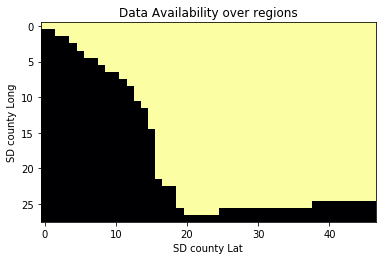

In [15]:
plt.imshow(~SD_county_dead_fuel_mois_100.mask, cmap='inferno', interpolation='nearest')
plt.xlabel("SD county Lat")
plt.ylabel("SD county Long")
plt.title("Data Availability over regions")
plt.show()

In [167]:
SD_county_max_air_temp.mask[15]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

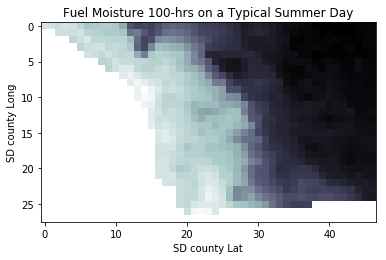

In [28]:
plt.imshow(SD_county_dead_fuel_mois_100_summer, cmap='bone', interpolation='nearest')
plt.xlabel("SD county Lat")
plt.ylabel("SD county Long")
plt.title("Fuel Moisture 100-hrs on a Typical Summer Day")
plt.show()

In [21]:
SD_county_dead_fuel_mois_100_winter = dead_fuel_mois_100[40][SD_county_lats[0][0]:SD_county_lats[0][-1],SD_county_lons[0][0]:SD_county_lons[0][-1]]

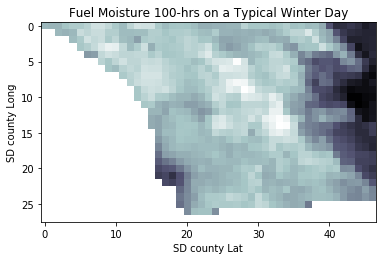

In [29]:
plt.imshow(SD_county_dead_fuel_mois_100_winter, cmap='bone', interpolation='nearest')
plt.xlabel("SD county Lat")
plt.ylabel("SD county Long")
plt.title("Fuel Moisture 100-hrs on a Typical Winter Day")
plt.show()